In [8]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/ally/Desktop/projects/capstone'

In [3]:
df = pd.read_csv('seasonal_disparities_20th_century.csv')

In [4]:
df.head()

,FIPSCode,YEAR,Season,TEMPERATURE_MA,TEMPERATURE_DEVIATION_STDDEV,TEMPERATURE_INDEX,PRECIPITATION_MA,PRECIPITATION_DEVIATION_STDDEV,PRECIPITATION_INDEX
0,6001,2021,Summer,68.7,1.847292,Normal,0.00,-0.686548,Normal
1,6005,2021,Winter,42.6,-0.506057,Normal,12.34,1.702105,Normal
2,6009,2021,Winter,42.6,-0.542606,Normal,10.80,1.422228,Normal
3,6019,2021,Winter,41.0,0.454152,Normal,6.96,1.639776,Normal
4,6029,2021,Summer,79.3,2.528477,Hotter,0.05,-0.067581,Normal


In [5]:
df.columns

Index(['FIPSCode', 'YEAR', 'Season', 'TEMPERATURE_MA',
       'TEMPERATURE_DEVIATION_STDDEV', 'TEMPERATURE_INDEX', 'PRECIPITATION_MA',
       'PRECIPITATION_DEVIATION_STDDEV', 'PRECIPITATION_INDEX'],
      dtype='object')

In [17]:
df.TEMPERATURE_INDEX.unique()

array(['Normal', 'Hotter', 'Cooler'], dtype=object)

In [14]:
len(df.FIPSCode.unique())

3140

In [21]:
colors = {'Hotter': 'red', 'Cooler': 'blue', 'Normal':'grey'}

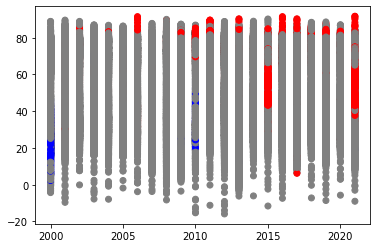

In [23]:
_ = plt.scatter(df.YEAR, df.TEMPERATURE_MA, color=df.TEMPERATURE_INDEX.map(colors))

In [30]:
fips_df = pd.read_excel('County-Type-Share.xlsx', sheet_name='Sheet1')

/Users/ally/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [44]:
fips = pd.read_excel('County-Type-Share.xlsx', sheet_name='Sheet2')
fips = fips.to_dict('series')['New Names']
fips

0                     Exurbs
1            Graying America
2     African American South
3           Evangelical Hubs
4      Working Class Country
5             Military Posts
6              Urban Suburbs
7           Hispanic Centers
8      Native American Lands
9       Rural Middle America
10             College Towns
11              LDS Enclaves
12           Aging Farmlands
13                Big Cities
14            Middle Suburbs
Name: New Names, dtype: object

In [45]:
fips_dict = dict(fips)

In [34]:
fips_df = fips_df[['County', 'Type Number', 'FIPS']]
fips_df.head()

,County,Type Number,FIPS
0,Autauga AL,1,1001
1,Elmore AL,1,1051
2,Limestone AL,1,1083
3,St. Clair AL,1,1115
4,Shelby AL,1,1117


In [52]:
df_merge = df.merge(fips_df, left_on='FIPSCode', right_on='FIPS')

In [55]:
len(fips_df)

3143

In [64]:
df_merge = df_merge.dropna()

In [89]:
import random

number_of_colors = len(fips_dict)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

col = {}
for i in range(len(color)):
    col[i] = color[i]

In [87]:
df_merge['Type Number'].map(c)

0         #C65A27
1         #C65A27
2         #C65A27
3         #C65A27
4         #C65A27
           ...   
138154    #926DDB
138155    #926DDB
138156    #926DDB
138157    #926DDB
138158    #926DDB
Name: Type Number, Length: 138158, dtype: object

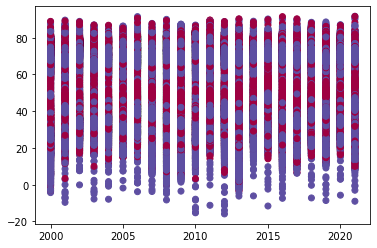

In [100]:
cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=4, vmax=5)
_ = plt.scatter(df_merge.YEAR, df_merge.TEMPERATURE_MA, c=cmap(norm(df_merge['Type Number'])))

In [24]:
train_len = round(len(df)*.65)
train_df = df[0:train_len].dropna()

In [25]:
test_len = len(df) - train_len
test_df = df[test_len:].dropna()

In [26]:
train_x = train_df[['PRECIPITATION_MA', 'PRECIPITATION_DEVIATION_STDDEV']]
train_y = train_df['PRECIPITATION_INDEX']
test_x =  test_df[['PRECIPITATION_MA', 'PRECIPITATION_DEVIATION_STDDEV']]
test_y = test_df['PRECIPITATION_INDEX']

In [27]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_x, train_y)

SVC()

In [28]:
test = []
for ma, std in zip(test_x.PRECIPITATION_MA, test_x.PRECIPITATION_DEVIATION_STDDEV):
    test.append(clf.predict([[ma, std]])[0])

In [38]:
clf.predict([[10.6, 1.2]])[0]

'Normal'

In [27]:
clf.predict([[9.6, 1.2]])

array(['Normal'], dtype=object)

In [28]:
df.PRECIPITATION_INDEX.unique()

array(['Normal', 'Wetter', 'Drier', nan], dtype=object)

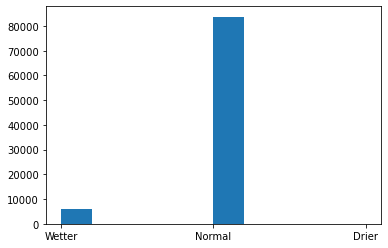

In [54]:
_ = plt.hist(test)
_ = plt.hist(test_y)

In [103]:
len(test)

89861

In [105]:
df2 = pd.DataFrame(columns=['y', 'y_hat'])
df2.y = test_df.PRECIPITATION_INDEX.dropna()
df2.y_hat = test
df2.head()

,y,y_hat
48386,Wetter,Wetter
48387,Normal,Normal
48388,Normal,Normal
48389,Wetter,Wetter
48390,Normal,Normal


In [111]:
df2[df2.y != df2.y_hat]

,y,y_hat
48418,Drier,Normal
48637,Wetter,Normal
50034,Normal,Wetter
50687,Normal,Wetter
51766,Wetter,Normal
...,...,...
135236,Normal,Wetter
135861,Wetter,Normal
136186,Normal,Wetter
138095,Wetter,Normal


In [110]:
(len(df2[df2.y != df2.y_hat]) / len(df)) * 100

0.07812104421795771